In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline

# ANN - XOR

In [2]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

Declaracion de variables

In [3]:
input_size=2
hidden_layers=2
middle_layer=2
output_size=1
x=tf.placeholder(tf.float32,shape=[None,input_size])
y_=tf.placeholder(tf.float32,shape=[None,output_size])

Operaciones, grafo

In [4]:
W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_layer], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_layer]), name="b_layer1")

In [5]:
W_layer2 = tf.Variable(tf.random_uniform([hidden_layers,output_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_size]), name="b_layer2")

In [6]:
hidden_1=tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
y= tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2) 
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) 
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [7]:
init = tf.initialize_all_variables()
sess = tf.Session() 

Instructions for updating:
Use `tf.global_variables_initializer` instead.


## Correr programa

In [8]:
#Guardamos los pesos en cada iteración
all_w1 = []
all_w2 = []

sess.run(init)
for i in range(50000):
    sess.run(train_step, feed_dict={x: X, y_: Y})
    all_w1 += [sess.run(W_layer1)]
    all_w2 += [sess.run(W_layer2)]

In [52]:
l1 = [item[0][0] for item in all_w1]
l2 = [item[0][0] for item in all_w2]
x = range(49999)

In [53]:
# Calculamos las diferencias en valor absoluto para una W y la siguiente
l3 = [abs(j-i) for i,j in zip(l1, l1[1:])]
l4 = [abs(j-i) for i,j in zip(l2, l2[1:])]

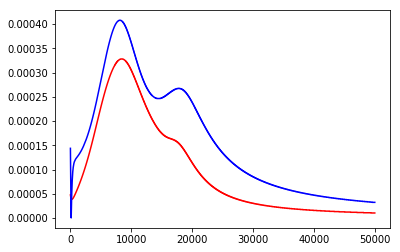

In [54]:
plt.plot(x, l3, 'r-') # Rojo - Tomamos uno de los pesos asociados a la capa mas a la derecha y analizamos su cambio
plt.plot(x, l4, 'b-') # Azul - Tomamos uno de los pesos asociados a la capa mas a la izquierda y analizamos su cambio
plt.show()


In [96]:
sess.close()

Notamos que las diferencias en la capa de la derecha converge a cero mucho mas rápido que la de la izquierda, como esperábamos.